# Relative norms analysis

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json

In [2]:
from notebooks.utils import load_sae, get_group_indices, get_group_norms

Triton not installed, using eager implementation of SAE decoder.


## Load data

In [3]:
# # L1
# # TopK
# run = '1414772_0'  # 0
# run = '1414908_0'  # 0.001
# run = '1414908_2'  # 0.005
# run = '1414908_4'  # 0.01
# run = '1414908_6'  # 0.05
# run = '1414772_2'  # 0.1
# run = '1414772_4'  # 0.5
# run = '1414772_6'  # 1
# run = '1414772_8'  # 10
# # normal scale
# run = '1423205_0'  # 0
# run = ''  # 0.001
# run = ''  # 0.005
# run = '1423205_2'  # 0.01
# run = '1423205_4'  # 0.05
run = '1423205_6'  # 0.1 best not dense?
# run = '1423205_8'  # 0.5
# run = '1423205_10'  # 1
# run = '1423773_0'  # 10
# run = '1423773_2' # 1000


# del sae
sae = load_sae(f"runs/run_lat5000_bs512_auxk0.03_k256_epoch10_{run}/0") 
cfg = json.load(open(f"runs/run_lat5000_bs512_auxk0.03_k256_epoch10_{run}/config.json") )
norm_type = cfg['sae']["per_block_norm"]
cfg["per_block_alpha"], cfg['sae']["per_block_norm"]

(0.1, 'l1')

In [4]:
sae.W_dec.shape

torch.Size([5000, 99648])

In [5]:
path = "weights2weights/weights_datasets/" 
dim_df = torch.load(path + "weight_dimensions_extended_df.pt")
input_group_norms = torch.load(path + f"group_norms_{norm_type}.pt")
input_group_norms.shape

torch.Size([7])

In [6]:
dim_df

0         1  lengths  \
base_model.model.down_blocks.0.attentions.0.tra...  (320,)  (1, 320)      320   
base_model.model.down_blocks.0.attentions.0.tra...  (320,)  (320, 1)      320   
base_model.model.down_blocks.0.attentions.0.tra...  (320,)  (1, 320)      320   
base_model.model.down_blocks.0.attentions.0.tra...  (320,)  (320, 1)      320   
base_model.model.down_blocks.0.attentions.0.tra...  (320,)  (1, 320)      320   
...                                                    ...       ...      ...   
base_model.model.up_blocks.3.attentions.2.trans...  (320,)  (320, 1)      320   
base_model.model.up_blocks.3.attentions.2.trans...  (320,)  (1, 320)      320   
base_model.model.up_blocks.3.attentions.2.trans...  (320,)  (320, 1)      320   
base_model.model.up_blocks.3.attentions.2.trans...  (768,)  (1, 768)      768   
base_model.model.up_blocks.3.attentions.2.trans...  (320,)  (320, 1)      320   

                                                    start    end   block_type  \
base_model.model.down_blocks.0.attentions.0.tra...      0    320  down_blocks   
base_model.model.down_blocks.0.attentions.0.tra...    320    640  down_blocks   
base_model.model.down_blocks.0.attentions.0.tra...    640    960  down_blocks   
base_model.model.down_blocks.0.attentions.0.tra...    960   1280  down_blocks   
base_model.model.down_blocks.0.attentions.0.tra...   1280   1600  down_blocks   
...                                                   ...    ...          ...   
base_model.model.up_blocks.3.attentions.2.trans...  97600  97920    up_blocks   
base_model.model.up_blocks.3.attentions.2.trans...  97920  98240    up_blocks   
base_model.model.up_blocks.3.attentions.2.trans...  98240  98560    up_blocks   
base_model.model.up_blocks.3.attentions.2.trans...  98560  99328    up_blocks   
base_model.model.up_blocks.3.attentions.2.trans...  99328  99648    up_blocks   

                                                   block_number  \
base_model.model.down_blocks.0.attentions.0.tra...            0   
base_model.model.down_blocks.0.attentions.0.tra...            0   
base_model.model.down_blocks.0.attentions.0.tra...            0   
base_model.model.down_blocks.0.attentions.0.tra...            0   
base_model.model.down_blocks.0.attentions.0.tra...            0   
...                                                         ...   
base_model.model.up_blocks.3.attentions.2.trans...            3   
base_model.model.up_blocks.3.attentions.2.trans...            3   
base_model.model.up_blocks.3.attentions.2.trans...            3   
base_model.model.up_blocks.3.attentions.2.trans...            3   
base_model.model.up_blocks.3.attentions.2.trans...            3   

                                                   attentions_number  \
base_model.model.down_blocks.0.attentions.0.tra...                 0   
base_model.model.down_blocks.0.attentions.0.tra...                 0   
base_model.model.down_blocks.0.attentions.0.tra...                 0   
base_model.model.down_blocks.0.attentions.0.tra...                 0   
base_model.model.down_blocks.0.attentions.0.tra...                 0   
...                                                              ...   
base_model.model.up_blocks.3.attentions.2.trans...                 2   
base_model.model.up_blocks.3.attentions.2.trans...                 2   
base_model.model.up_blocks.3.attentions.2.trans...                 2   
base_model.model.up_blocks.3.attentions.2.trans...                 2   
base_model.model.up_blocks.3.attentions.2.trans...                 2   

                                                   attn_number attn_proj  \
base_model.model.down_blocks.0.attentions.0.tra...           1      to_q   
base_model.model.down_blocks.0.attentions.0.tra...           1      to_q   
base_model.model.down_blocks.0.attentions.0.tra...           1      to_v   
base_model.model.down_blocks.0.attentions.0.tra...           1      to_v   
base_model.model.down_blocks.0.attentions.0.tra...           

In [7]:
acts_clamps = torch.load(f"{path}/acts_clamps_20250528.pt")

## Calculate and scale block norms

In [8]:
base_norms = get_group_norms(get_group_indices(dim_df), sae.W_dec, None) # not scaled
base_norms.shape

torch.Size([5000, 7])

In [9]:
block_labels = [f"{block}_{n}" for i, (block, n) in dim_df[["block_type", "block_number"]].reset_index(drop=True).drop_duplicates().reset_index(drop=True).iterrows()]

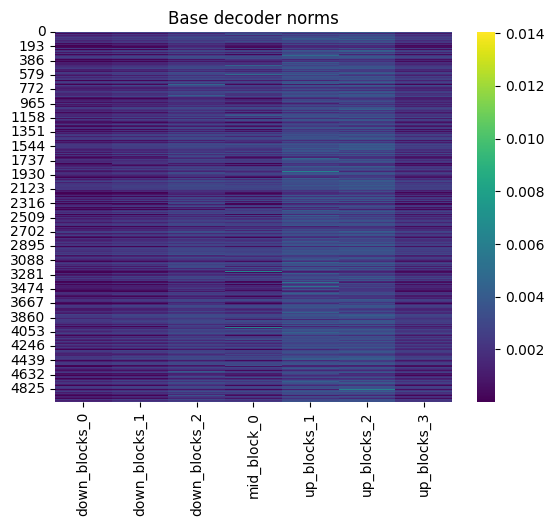

In [10]:
sns.heatmap(base_norms.cpu().detach(), cmap="viridis", xticklabels=block_labels)
plt.title("Base decoder norms")
plt.show()

In [11]:
base_norms.min(dim=0).values, base_norms.max(dim=0).values, base_norms.mean(dim=0)

(tensor([1.4104e-05, 3.0312e-05, 1.4967e-04, 2.6557e-05, 3.4421e-04, 3.5342e-04,
         7.2927e-05], device='cuda:0', grad_fn=<MinBackward0>),
 tensor([0.0130, 0.0050, 0.0061, 0.0140, 0.0078, 0.0114, 0.0092],
        device='cuda:0', grad_fn=<MaxBackward0>),
 tensor([0.0015, 0.0018, 0.0024, 0.0022, 0.0029, 0.0030, 0.0019],
        device='cuda:0', grad_fn=<MeanBackward1>))

In [12]:
decoder_norms = get_group_norms(get_group_indices(dim_df), sae.W_dec, input_group_norms) # already scaled
decoder_norms.shape

torch.Size([5000, 7])

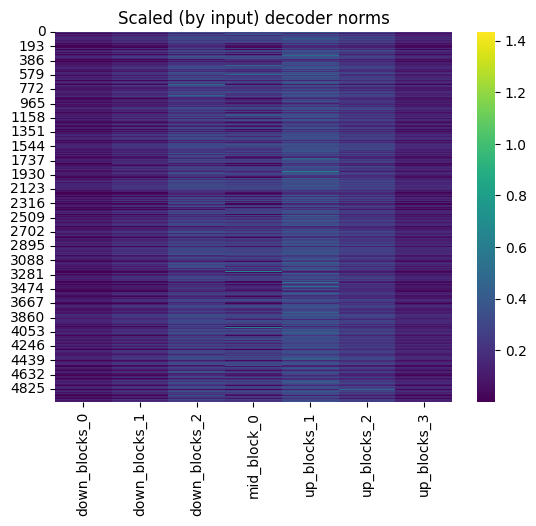

In [13]:
sns.heatmap(decoder_norms.cpu().detach(), cmap="viridis", xticklabels=block_labels)
plt.title("Scaled (by input) decoder norms")
plt.show()

In [14]:
decoder_norms.min(), decoder_norms.max(), decoder_norms.mean()

(tensor(0.0009, device='cuda:0', grad_fn=<MinBackward1>),
 tensor(1.4326, device='cuda:0', grad_fn=<MaxBackward1>),
 tensor(0.1947, device='cuda:0', grad_fn=<MeanBackward0>))

In [15]:
decoder_norms.shape

torch.Size([5000, 7])

In [16]:
decoder_norms.min(dim=0).values, decoder_norms.max(dim=0).values, decoder_norms.mean(dim=0)

(tensor([0.0009, 0.0026, 0.0156, 0.0027, 0.0348, 0.0268, 0.0046],
        device='cuda:0', grad_fn=<MinBackward0>),
 tensor([0.8454, 0.4184, 0.6405, 1.4326, 0.7882, 0.8632, 0.5856],
        device='cuda:0', grad_fn=<MaxBackward0>),
 tensor([0.0973, 0.1495, 0.2464, 0.2249, 0.2980, 0.2259, 0.1209],
        device='cuda:0', grad_fn=<MeanBackward1>))

In [17]:
sum_norms = decoder_norms.sum(dim=1,keepdim=True)
sum_norms.min(), sum_norms.max(), sum_norms.mean()

(tensor(0.4722, device='cuda:0', grad_fn=<MinBackward1>),
 tensor(2.1258, device='cuda:0', grad_fn=<MaxBackward1>),
 tensor(1.3630, device='cuda:0', grad_fn=<MeanBackward0>))

In [18]:
sum_norms.shape

torch.Size([5000, 1])

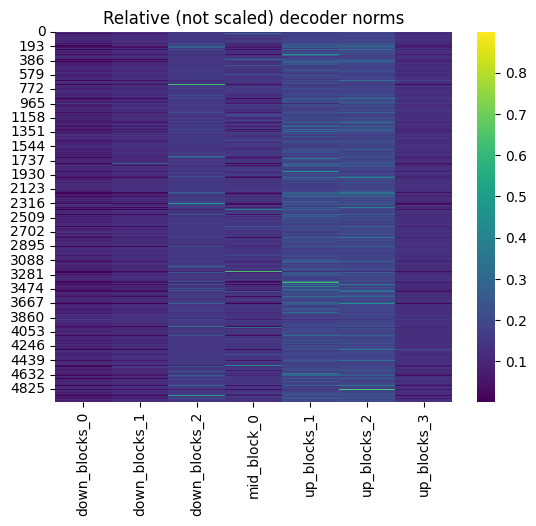

In [19]:
relative_base_norms = base_norms.div(base_norms.sum(dim=1,keepdim=True))
sns.heatmap(relative_base_norms.cpu().detach(), cmap="viridis", xticklabels=block_labels)
plt.title("Relative (not scaled) decoder norms")
plt.show()

In [20]:
relative_norms = decoder_norms.div(decoder_norms.sum(dim=1,keepdim=True))
relative_norms.shape

torch.Size([5000, 7])

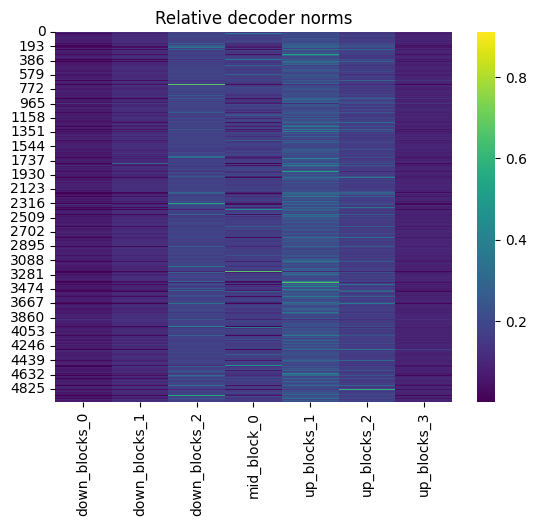

In [21]:
sns.heatmap(relative_norms.cpu().detach(), cmap="viridis", xticklabels=block_labels)
plt.title("Relative decoder norms")
plt.show()

In [22]:
relative_norms.min(), relative_norms.max(), relative_norms.mean()

(tensor(0.0015, device='cuda:0', grad_fn=<MinBackward1>),
 tensor(0.9100, device='cuda:0', grad_fn=<MaxBackward1>),
 tensor(0.1429, device='cuda:0', grad_fn=<MeanBackward0>))

In [23]:
relative_norms.min(dim=0).values, relative_norms.max(dim=0).values, relative_norms.mean(dim=0)

(tensor([0.0015, 0.0031, 0.0225, 0.0048, 0.0338, 0.0180, 0.0053],
        device='cuda:0', grad_fn=<MinBackward0>),
 tensor([0.8293, 0.6144, 0.7663, 0.9100, 0.8521, 0.8194, 0.8607],
        device='cuda:0', grad_fn=<MaxBackward0>),
 tensor([0.0665, 0.1032, 0.1850, 0.1587, 0.2277, 0.1732, 0.0857],
        device='cuda:0', grad_fn=<MeanBackward1>))

Because for each block the max norm is no bigger that ~0.5 there are no features activating for just one block?

- 1/n = 0.14 for n=7 so it  could be said that all features activate for each block more or less the same bc the relative_norms.mean(dim=0) ranges from 0.08 to 0.2
- 2/n = 0.28
- 3/n = 0.42
- 4/n = 0.56
- 5/n = 0.70
- 6/n = 0.84
- 7/n = 0.98

In [24]:
relative_norms[:10]

tensor([[0.0515, 0.0890, 0.1678, 0.1043, 0.3259, 0.1703, 0.0913],
        [0.0847, 0.1293, 0.1826, 0.1759, 0.1827, 0.1502, 0.0945],
        [0.0307, 0.0771, 0.1960, 0.1111, 0.2826, 0.2197, 0.0828],
        [0.0036, 0.0478, 0.2167, 0.0144, 0.4068, 0.2873, 0.0234],
        [0.0906, 0.1254, 0.1824, 0.1608, 0.1877, 0.1572, 0.0958],
        [0.0719, 0.1135, 0.1802, 0.1755, 0.2117, 0.1565, 0.0909],
        [0.0642, 0.1013, 0.1931, 0.1219, 0.2198, 0.2095, 0.0902],
        [0.0833, 0.1266, 0.1815, 0.1708, 0.1865, 0.1549, 0.0964],
        [0.0592, 0.1096, 0.1758, 0.1622, 0.2339, 0.1722, 0.0872],
        [0.0829, 0.1147, 0.1829, 0.1670, 0.1954, 0.1601, 0.0970]],
       device='cuda:0', grad_fn=<SliceBackward0>)

## Get strongest features

In [25]:
i = relative_norms[:, 4].argmax()
relative_norms[i]

tensor([0.0091, 0.0182, 0.0393, 0.0248, 0.8521, 0.0422, 0.0145],
       device='cuda:0', grad_fn=<SelectBackward0>)

In [26]:
top_rel_norms = relative_norms.topk(2, dim=0)

## Plot histograms

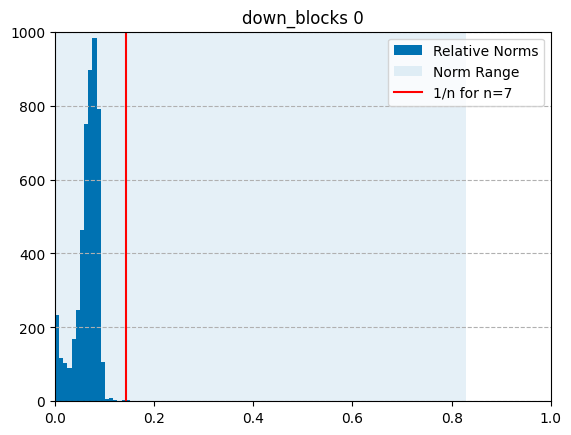

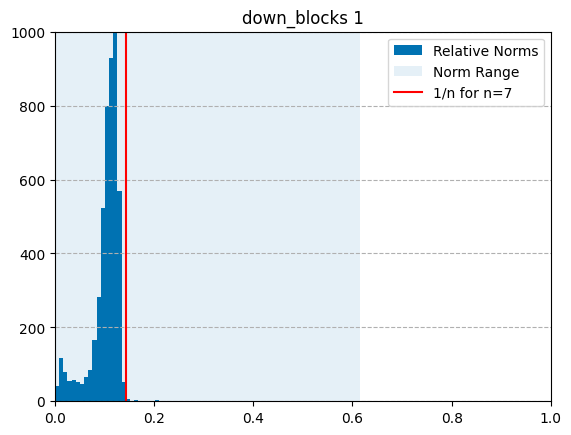

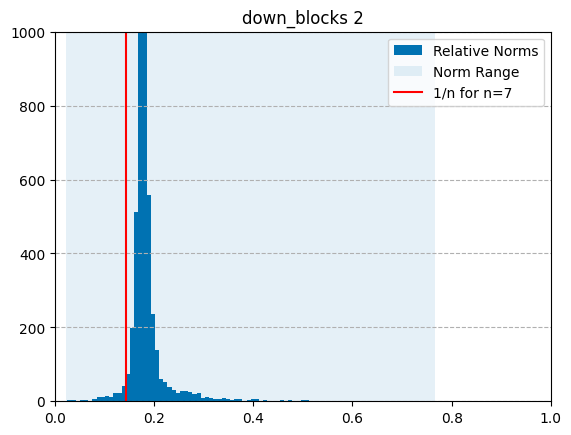

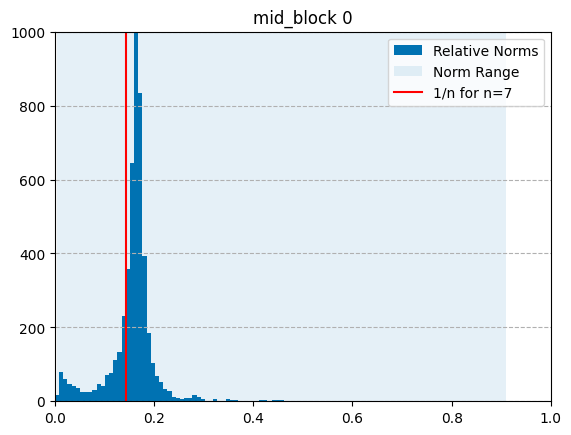

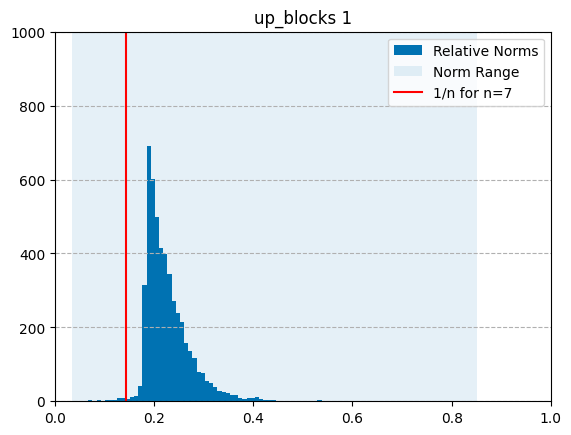

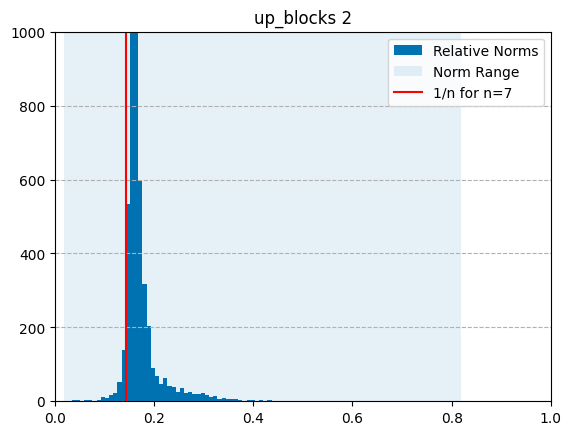

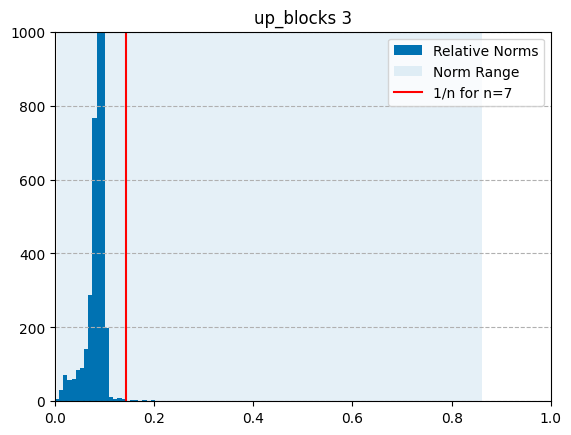

In [27]:
from matplotlib.ticker import MultipleLocator


for i, (block, n) in dim_df[["block_type", "block_number"]].reset_index(drop=True).drop_duplicates().reset_index(drop=True).iterrows():
    fig, ax = plt.subplots()
    d = relative_norms[:, i].cpu().detach()
    ax.hist(d, bins=np.linspace(0,1,120), label="Relative Norms")
    plt.title(f"{block} {n}")

    plt.axvspan(xmin=min(d), xmax=max(d), alpha=0.1, label="Norm Range")
    plt.axvline(1/7, color='red', label="1/n for n=7")
    plt.xlim((0,1))
    plt.ylim((0,1000))
    # plt.yscale('log')
    plt.grid(True, axis='y', linestyle='--')
    ax.yaxis.set_major_locator(MultipleLocator(200))
    plt.legend()
    plt.show()

## Check effect of strongest features (in each block)

In [28]:
for i, (block, n) in dim_df[["block_type", "block_number"]].reset_index(drop=True).drop_duplicates().reset_index(drop=True).iterrows():
    print(f"Strongest features for {block} {n}: {top_rel_norms.indices[:, i].tolist()}")

Strongest features for down_blocks 0: [2443, 3928]
Strongest features for down_blocks 1: [4553, 716]
Strongest features for down_blocks 2: [783, 1000]
Strongest features for mid_block 0: [1916, 3241]
Strongest features for up_blocks 1: [563, 810]
Strongest features for up_blocks 2: [4208, 4768]
Strongest features for up_blocks 3: [652, 4384]


### Prep diffusion

In [29]:
from notebooks.utils import load_diffusion, get_diffusion_params, array_to_dict, get_error, get_image, add_error

In [30]:
from sae.sae import EncoderOutput

In [31]:
base_weights, pipe = load_diffusion()
prompt, ddim_steps, guidance_scale, negative_prompt, latents = get_diffusion_params(pipe)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

/net/tscratch/people/plgkingak/w2w/lib/python3.12/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
/net/tscratch/people/plgkingak/w2w/lib/python3.12/site-packages/peft/tuners/lora/model.py:364: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  return getattr(self.model, name)


In [32]:
samples = torch.load(path + "evaluation_samples.pt")
sample = samples[0]
weights = array_to_dict(sample, base_weights)

In [33]:
err = get_error(sae, sample, base_weights)

In [34]:
e = sae.encode(sample)

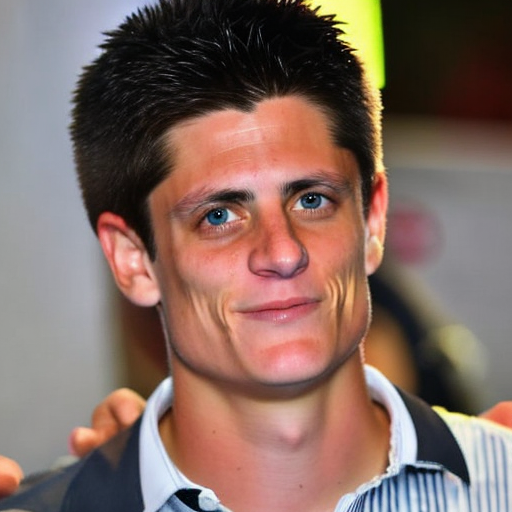

In [35]:
img = get_image(weights, pipe, prompt, ddim_steps, guidance_scale, negative_prompt,latents)
img

### Create edits

In [36]:
import numpy as np

In [37]:
(top_rel_norms.indices.flatten().unsqueeze(1) == (e.top_indices)).any(dim=1)


tensor([False,  True, False,  True, False, False,  True, False,  True, False,
         True, False, False,  True], device='cuda:0')

In [38]:
top_rel_norms

torch.return_types.topk(
values=tensor([[0.8293, 0.6144, 0.7663, 0.9100, 0.8521, 0.8194, 0.8607],
        [0.8285, 0.5261, 0.7433, 0.8528, 0.6880, 0.7383, 0.5383]],
       device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor([[2443, 4553,  783, 1916,  563, 4208,  652],
        [3928,  716, 1000, 3241,  810, 4768, 4384]], device='cuda:0'))

In [46]:
acts_clamps[0,1]

tensor(0.0550)

Strongest features for down_blocks 0
Strongest features for down_blocks 1
Feature 4553
Base value: tensor([0.1649], device='cuda:0')


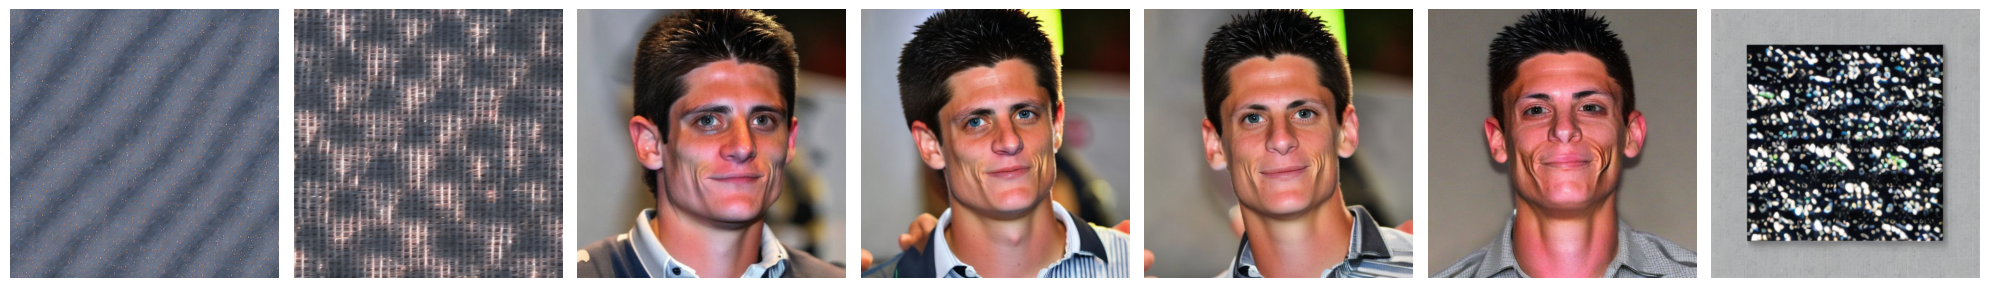

Feature 716
Base value: tensor([0.0650], device='cuda:0')


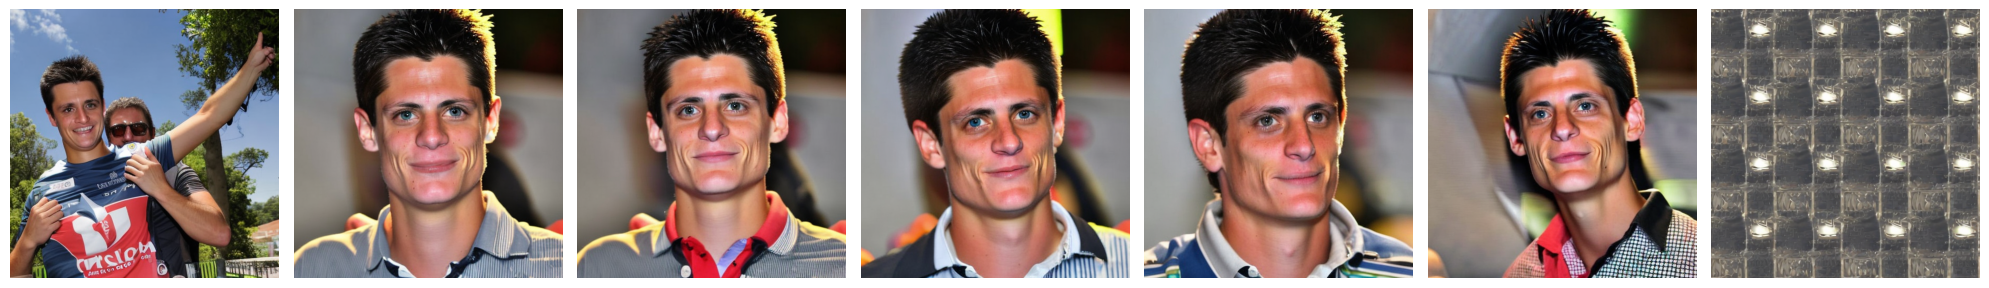

Strongest features for down_blocks 2
Strongest features for mid_block 0
Feature 1916
Base value: tensor([0.4005], device='cuda:0')


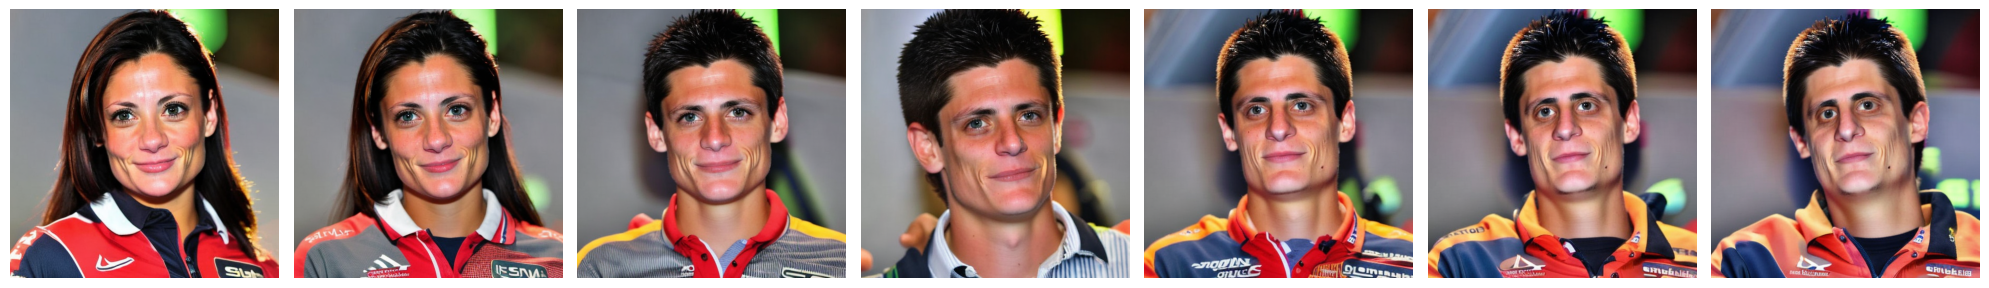

Feature 3241
Base value: tensor([0.1091], device='cuda:0')


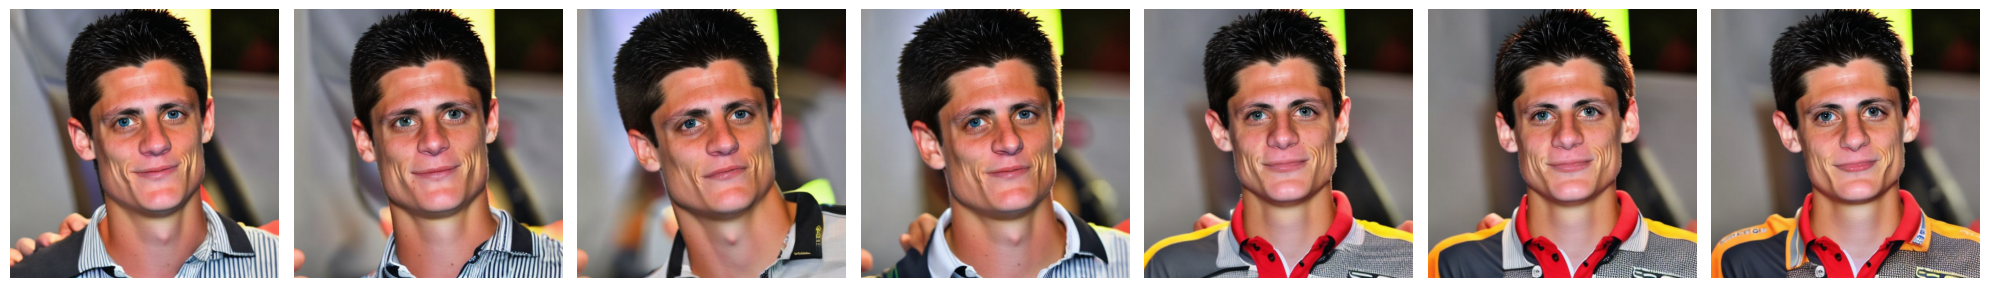

Strongest features for up_blocks 1
Strongest features for up_blocks 2
Strongest features for up_blocks 3
Feature 652
Base value: tensor([0.1123], device='cuda:0')


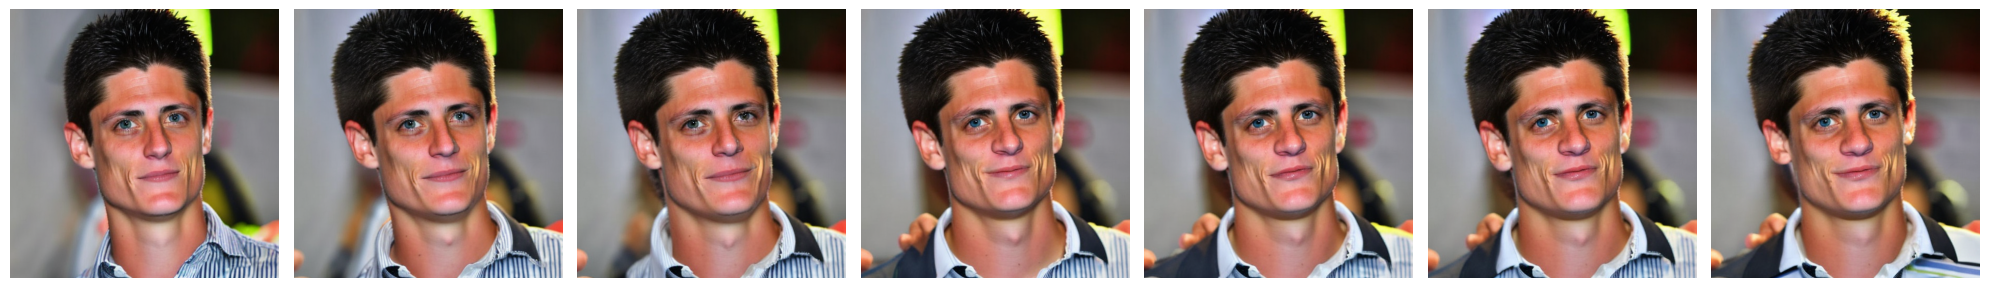

Feature 4384
Base value: tensor([0.0614], device='cuda:0')


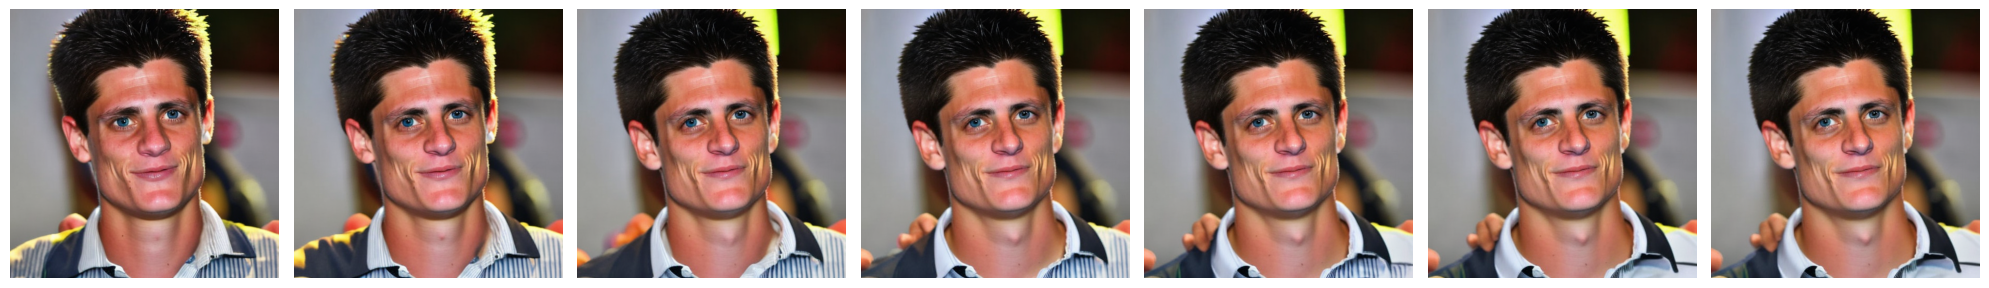

In [50]:
for i, (block, n) in dim_df[["block_type", "block_number"]].reset_index(drop=True).drop_duplicates().reset_index(drop=True).iterrows():
    print(f"Strongest features for {block} {n}")
    # if block == 'down_blocks':
    #     continue
    for f in top_rel_norms.indices[:, i].tolist():
        images = []
        base_value = e.top_acts[e.top_indices == f].clone().detach()
        if base_value.numel() == 0:
            break
        print(f"Feature {f}")
        print(f"Base value: {base_value}")
        for v in np.linspace(-30,30,7):
            if base_value.numel() == 0:
                e2 = EncoderOutput(top_acts=torch.cat((e.top_acts,torch.tensor([v]).to(sae.device)), 0),
                top_indices=torch.cat((e.top_indices,torch.tensor([f]).to(sae.device)), 0))
            else:
                e2 = EncoderOutput(top_acts=e.top_acts.clone(),top_indices=e.top_indices.clone())
                e2.top_acts[e2.top_indices == f] = v * base_value
            weights_out = sae.decode(e2.top_acts, e2.top_indices)
            # no error
            # img = get_image(array_to_dict(weights_out, base_weights),  pipe, prompt, ddim_steps, guidance_scale, negative_prompt,latents)
            img = get_image(add_error(err, array_to_dict(weights_out, base_weights)),  pipe, prompt, ddim_steps, guidance_scale, negative_prompt,latents)
            images.append(img)
        if f == 1916:
            lady_images = images
        plt.figure(figsize=(20, 3))
        for i, img in enumerate(images):
            plt.subplot(1, len(images), i + 1)
            plt.imshow(img)
            plt.axis("off")
        plt.tight_layout()
        plt.show()

In [ ]:
for i, (block, n) in dim_df[["block_type", "block_number"]].reset_index(drop=True).drop_duplicates().reset_index(drop=True).iterrows():
    print(f"Strongest features for {block} {n}")
    # if block == 'down_blocks':
    #     continue
    for f in top_rel_norms.indices[:, i].tolist():
        min_v, max_v = acts_clamps[f, 0], acts_clamps[f, 2]
        images = []
        base_value = e.top_acts[e.top_indices == f].clone().detach()
        if base_value.numel() == 0:
            base_value = acts_clamps[f, 1]
        print(f"Feature {f}")
        print(f"Base value: {base_value}")
        for v in np.linspace(min_v, max_v, 7):
            if base_value.numel() == 0:
                e2 = EncoderOutput(top_acts=torch.cat((e.top_acts,torch.tensor([v]).to(sae.device)), 0),
                top_indices=torch.cat((e.top_indices,torch.tensor([f]).to(sae.device)), 0))
            else:
                e2 = EncoderOutput(top_acts=e.top_acts.clone(),top_indices=e.top_indices.clone())
                e2.top_acts[e2.top_indices == f] = v 
            weights_out = sae.decode(e2.top_acts, e2.top_indices)
            # no error
            img = get_image(array_to_dict(weights_out, base_weights),  pipe, prompt, ddim_steps, guidance_scale, negative_prompt,latents)
            # img = get_image(add_error(err, array_to_dict(weights_out, base_weights)),  pipe, prompt, ddim_steps, guidance_scale, negative_prompt,latents)
            images.append(img)
        if f == 1916:
            lady_images = images
        plt.figure(figsize=(20, 3))
        for i, img in enumerate(images):
            plt.subplot(1, len(images), i + 1)
            plt.imshow(img)
            plt.axis("off")
        plt.tight_layout()
        plt.show()

In [51]:
acts_clamps[1916]

tensor([9.0939e-08, 2.8240e-01, 4.5117e-01])

### Use CLIP

In [271]:
lady_images

[<PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>,
 <PIL.Image.Image image mode=RGB size=512x512>]

In [270]:
from transformers import CLIPProcessor, CLIPModel
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [277]:
clip_prompts = [
    "a person who is male",
    "a person who is a man",
    "a person who is masculine",
    "a person who is female",
    "a person who is a woman",
    "a person who is feminine",
]
clip_prompts = ["a photo of " + d for d in clip_prompts]

In [278]:
inputs = processor(text=clip_prompts, images=lady_images, return_tensors="pt", padding=True)

with torch.no_grad():
    outputs = model(**inputs)
    image_embed = torch.nn.functional.normalize(outputs.image_embeds, p=2, dim=-1)  # shape: (1, 512)
    text_embeds = torch.nn.functional.normalize(outputs.text_embeds, p=2, dim=-1) 

similarities = (text_embeds @ image_embed.T).squeeze()  # shape: (num_texts,)

similarities

tensor([[0.2363, 0.2488, 0.2448, 0.2432, 0.2505, 0.2423, 0.2414],
        [0.2148, 0.2296, 0.2284, 0.2305, 0.2458, 0.2486, 0.2458],
        [0.2263, 0.2386, 0.2353, 0.2364, 0.2425, 0.2221, 0.2221],
        [0.2395, 0.2496, 0.2466, 0.2466, 0.2547, 0.2283, 0.2256],
        [0.2355, 0.2497, 0.2482, 0.2485, 0.2535, 0.2247, 0.2197],
        [0.2232, 0.2314, 0.2265, 0.2324, 0.2409, 0.2144, 0.2114]])